In [97]:
import json
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Fonction pour lire les données de transcription
def read_transcription(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Fonction pour lire les données du graphe de discours
def read_discourse_graph(file_path):
    with open(file_path, 'r') as file:
        data = [line.strip().split() for line in file]

    # Convertir les valeurs non numériques en indices numériques
    data = [(int(start), relation, int(end)) if start.isdigit() and end.isdigit() else (start, relation, end) for start, relation, end in data]

    return data

def create_dataframe(dialogue_id, transcription, discourse_graph, relation_dict, speaker_dict):
    rows = []

      # Iterate through all edges in the discourse graph
    for edge in discourse_graph:
        index_start, relation_type, index_end = edge

        # Retrieve speaker information
        speaker = transcription[index_start]['speaker']

        # Convert relation type to integer using the dictionary
        speaker_id = speaker_dict.get(speaker, -1)

        # Retrieve the sentence
        text = transcription[index_start]['text']

        # Convert relation type to integer using the dictionary
        relation_type_id = relation_dict.get(relation_type, -1)

        # Add a row to the DataFrame
        rows.append({
            'dialogue_id': dialogue_id,
            'index_start': index_start,
            'text': text,
            'index_end': index_end,
            'speaker_type': speaker_id,
            'speaker_text': speaker,
            'relation_type': relation_type_id,
            'relation_text': relation_type
        })

    # Create the DataFrame
    df = pd.DataFrame(rows)

    return df


# Fonction pour créer le dictionnaire de conversion des relations
def create_relation_dict(discourse_graph):
    relation_set = set()

    # Collecter toutes les relations uniques
    for edge in discourse_graph:
        relation_set.add(edge[1])

    # Créer un dictionnaire de conversion
    relation_dict = {relation: idx for idx, relation in enumerate(relation_set)}

    return relation_dict

# Fonction pour créer le dictionnaire de conversion des speakers
def create_speaker_dict(transcription):
    speaker_set = set()

    # Collecter tous les locuteurs uniques
    for utterance in transcription:
        speaker_set.add(utterance['speaker'])

    # Créer un dictionnaire de conversion
    speaker_dict = {speaker: idx for idx, speaker in enumerate(speaker_set)}

    return speaker_dict

def flatten(list_of_list):
    return [item for sublist in list_of_list for item in sublist]

# Function to get labels for a dialogue
def get_label(dialogue_id, index,labels_data):
    return labels_data.get(dialogue_id, [])[index]


In [99]:
# Remplacez 'votre_chemin' par le chemin correct
path_train= Path("data/training")
path_test= Path("data/test")

# Remplacez 'vos_dialogue_ids' par votre liste réelle d'identifiants de dialogue
dialogue_ids = ['ES2002', 'ES2005', 'ES2006', 'ES2007', 'ES2008', 'ES2009', 'ES2010', 'ES2012', 'ES2013', 'ES2015', 'ES2016', 'IS1000', 'IS1001', 'IS1002', 'IS1003', 'IS1004', 'IS1005', 'IS1006', 'IS1007', 'TS3005', 'TS3008', 'TS3009', 'TS3010', 'TS3011', 'TS3012']
dialogue_ids = flatten([[m_id+s_id for s_id in 'abcd'] for m_id in dialogue_ids])
dialogue_ids.remove('IS1002a')
dialogue_ids.remove('IS1005d')
dialogue_ids.remove('TS3012c')

dialogue_ids_test = ['ES2003', 'ES2004', 'ES2011', 'ES2014', 'IS1008', 'IS1009', 'TS3003', 'TS3004', 'TS3006', 'TS3007']
dialogue_ids_test = flatten([[m_id+s_id for s_id in 'abcd'] for m_id in dialogue_ids_test])

# Liste pour stocker les DataFrames de chaque dialogue
dfs = []
dfs_test = []


In [100]:
# Parcourir chaque dialogue
for dialogue_id in dialogue_ids:
    # Lire les données de transcription et de graphe de discours
    transcription = read_transcription(path_train / f'{dialogue_id}.json')
    discourse_graph = read_discourse_graph(path_train / f'{dialogue_id}.txt')
    
    # Créer le dictionnaire de conversion des relations
    relation_dict = create_relation_dict(discourse_graph)
    speaker_dict = create_speaker_dict(transcription)

    # Créer le DataFrame pour le dialogue actuel
    df = create_dataframe(dialogue_id, transcription, discourse_graph, relation_dict, speaker_dict)
    
    # Ajouter le DataFrame à la liste
    dfs.append(df)

# Parcourir chaque dialogue
for dialogue_id in dialogue_ids_test:
    # Lire les données de transcription et de graphe de discours
    transcription = read_transcription(path_test / f'{dialogue_id}.json')
    discourse_graph = read_discourse_graph(path_test / f'{dialogue_id}.txt')
    
    # Créer le dictionnaire de conversion des relations
    relation_dict = create_relation_dict(discourse_graph)
    speaker_dict = create_speaker_dict(transcription)

    # Créer le DataFrame pour le dialogue actuel
    df = create_dataframe(dialogue_id, transcription, discourse_graph, relation_dict, speaker_dict)
    
    # Ajouter le DataFrame à la liste
    dfs_test.append(df)

In [101]:
# Concaténer tous les DataFrames en un seul
df = pd.concat(dfs, ignore_index=True)
df_test = pd.concat(dfs_test, ignore_index=True)

with open("data/training_labels.json", 'r') as file:
    labels_data = json.load(file)

df['label'] = df.apply(lambda row: get_label(row['dialogue_id'], row['index_start'], labels_data), axis=1)

# Afficher le DataFrame final
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72526 entries, 0 to 72525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dialogue_id    72526 non-null  object
 1   index_start    72526 non-null  int64 
 2   text           72526 non-null  object
 3   index_end      72526 non-null  int64 
 4   speaker_type   72526 non-null  int64 
 5   speaker_text   72526 non-null  object
 6   relation_type  72526 non-null  int64 
 7   relation_text  72526 non-null  object
 8   label          72526 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 5.0+ MB


,dialogue_id,index_start,text,index_end,speaker_type,speaker_text,relation_type,relation_text,label
0,ES2002a,0,Okay,1,1,PM,1,Continuation,0
1,ES2002a,1,Right,2,1,PM,1,Continuation,0
2,ES2002a,2,<vocalsound> Um well this is the kick-off meet...,3,1,PM,6,Explanation,1
3,ES2002a,3,Um <vocalsound> and um,4,1,PM,3,Elaboration,0
4,ES2002a,4,this is just what we're gonna be doing over th...,5,1,PM,1,Continuation,0


In [102]:
for transcription_id in dialogue_ids:
    bert_array = np.load('training/' + transcription_id + '.npy')
    
    # Obtenez les indices des lignes correspondant à la transcription_id
    indices = df[df['dialogue_id'] == transcription_id].index
    
    # Remplacez les valeurs de la colonne 'text' par les valeurs de bert_array
    for idx, value in enumerate(bert_array):
        df.at[indices[idx-1], 'text'] = value

for transcription_id in dialogue_ids_test:
    bert_array_test = np.load('test/' + transcription_id + '.npy')
    
    # Obtenez les indices des lignes correspondant à la transcription_id
    indices = df_test[df_test['dialogue_id'] == transcription_id].index
    
    # Remplacez les valeurs de la colonne 'text' par les valeurs de bert_array
    for idx, value in enumerate(bert_array_test):
        df_test.at[indices[idx-1], 'text'] = value


In [103]:
df_test.head()

,dialogue_id,index_start,text,index_end,speaker_type,speaker_text,relation_type,relation_text
0,ES2003a,0,"[-0.06684376, -0.10767134, 0.00158493, -0.0377...",1,1,PM,1,Continuation
1,ES2003a,0,"[-0.07298628, 0.052574955, -0.0014349254, -0.0...",2,1,PM,1,Continuation
2,ES2003a,2,"[-0.069116786, -0.030909952, 0.07359838, -0.06...",3,1,PM,0,Comment
3,ES2003a,3,"[-0.08550309, -0.08060705, 0.04556774, 0.04994...",4,1,PM,7,Explanation
4,ES2003a,4,"[-0.022576354, -0.028672846, -0.011893472, -0....",5,1,PM,7,Explanation


In [104]:
# Nombre d'éléments dans chaque liste
num_elements = len(df['text'].iloc[0])

# Créez de nouvelles colonnes pour chaque élément dans la liste
new_columns = [f'coord_{i}' for i in range(num_elements)]

# Appliquez une fonction qui divise chaque liste en plusieurs colonnes
new_text_columns = df['text'].apply(pd.Series)

# Renommez les nouvelles colonnes avec les noms spécifiques
new_text_columns.columns = new_columns

# Concaténez les nouvelles colonnes avec le DataFrame existant
df = pd.concat([df, new_text_columns], axis=1)

# Supprimez la colonne 'text' originale si nécessaire
df = df.drop(['text','speaker_text','relation_text' ], axis=1)





# Nombre d'éléments dans chaque liste
num_elements = len(df_test['text'].iloc[0])

# Appliquez une fonction qui divise chaque liste en plusieurs colonnes
new_text_columns_test = df_test['text'].apply(pd.Series)

# Renommez les nouvelles colonnes avec les noms spécifiques
new_text_columns_test.columns = new_columns

# Concaténez les nouvelles colonnes avec le DataFrame existant
df_test = pd.concat([df_test, new_text_columns_test], axis=1)

# Supprimez la colonne 'text' originale si nécessaire
df_test = df_test.drop(['text','speaker_text','relation_text' ], axis=1)


In [120]:
df_test.head()

,dialogue_id,index_start,index_end,speaker_type,relation_type,coord_0,coord_1,coord_2,coord_3,coord_4,...,coord_374,coord_375,coord_376,coord_377,coord_378,coord_379,coord_380,coord_381,coord_382,coord_383
0,ES2003a,0,1,1,1,-0.066844,-0.107671,0.001585,-0.037790,-0.075568,...,0.089991,0.017770,0.004204,0.015277,-0.003793,0.035303,0.063118,-0.012957,0.057301,-0.023757
1,ES2003a,0,2,1,1,-0.072986,0.052575,-0.001435,-0.013834,-0.060743,...,0.084046,0.017392,-0.011899,0.002536,0.007794,0.037757,0.123899,0.037111,0.105005,0.098142
2,ES2003a,2,3,1,0,-0.069117,-0.030910,0.073598,-0.066847,-0.036187,...,0.057107,-0.056366,0.004875,0.024899,-0.031351,-0.027805,0.029868,-0.065823,-0.027464,-0.058381
3,ES2003a,3,4,1,7,-0.085503,-0.080607,0.045568,0.049941,0.085909,...,0.054002,0.058658,-0.060597,0.026250,-0.028345,0.014901,0.068747,0.050202,0.064570,0.009540
4,ES2003a,4,5,1,7,-0.022576,-0.028673,-0.011893,-0.016977,0.053992,...,0.027556,0.016066,-0.029471,-0.008377,-0.026504,-0.055742,0.043690,-0.029209,0.006706,-0.045938


In [121]:
df['diff_index'] = df['index_end'] - df['index_start']
df_test['diff_index'] = df_test['index_end'] - df_test['index_start']

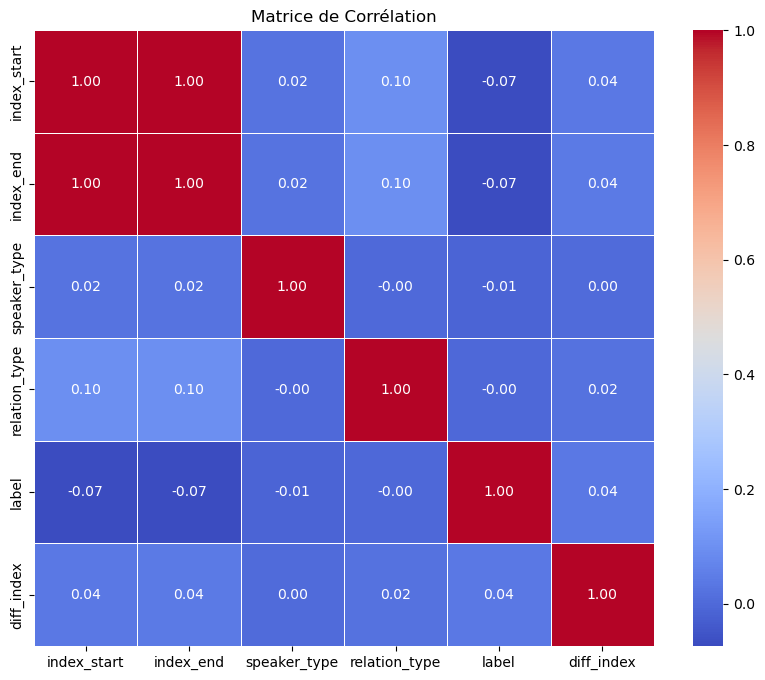

In [107]:
# Sélectionner les colonnes pour la matrice de corrélation
selected_columns = ['index_start', 'index_end', 'speaker_type', 'relation_type', 'label', 'diff_index']

# Créer un sous-dataframe avec les colonnes sélectionnées
corr_df = df[selected_columns]

# Calculer la matrice de corrélation
correlation_matrix = corr_df.corr()

# Tracer la matrice de corrélation colorée
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

In [108]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# Supprimer les colonnes non nécessaires de X_train (dialogue_id, index_start, index_end, etc.)
X = df.drop(['dialogue_id', 'label'], axis=1)

# Sélectionner la colonne 'label' comme y_train
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
y_train_ohe = to_categorical(y_train, num_classes=2)
y_test_ohe = to_categorical(y_test, num_classes=2)



In [122]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, Input

model = Sequential()
model.add(Input(389))
model.add(Dense(512, activation='relu'))  # Couche cachée avec 512 neurones
model.add(Dropout(0.5))  # Dropout pour la régularisation
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               199680    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dense_32 (Dense)            (None, 2)                 514       
                                                                 
Total params: 331522 (1.26 MB)
Trainable params: 331522 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
from tensorflow.keras import backend as K

# Définition de la fonction F1-score
def f1_score_keras(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2 * p * r / (p + r + K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)

    return K.mean(f1)

# Utilisation de la fonction F1-score comme métrique
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_score_keras])


In [111]:
model.fit(X_train, y_train_ohe, epochs=3, batch_size=32, validation_split=0.2, validation_data=[X_test,y_test_ohe])


Epoch 1/3
1587/1587 [==============================] - 7s 4ms/step - loss: 0.8679 - accuracy: 0.7409 - f1_score_keras: 0.4423 - val_loss: 0.5586 - val_accuracy: 0.7528 - val_f1_score_keras: 0.4283
Epoch 2/3
1587/1587 [==============================] - 6s 4ms/step - loss: 0.5578 - accuracy: 0.7575 - f1_score_keras: 0.4301 - val_loss: 0.5569 - val_accuracy: 0.7528 - val_f1_score_keras: 0.4283
Epoch 3/3
1587/1587 [==============================] - 5s 3ms/step - loss: 0.5530 - accuracy: 0.7573 - f1_score_keras: 0.4309 - val_loss: 0.5568 - val_accuracy: 0.7528 - val_f1_score_keras: 0.4306


In [112]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)

print(sum(y_pred_class))

680/680 [==============================] - 1s 1ms/step
29


In [113]:
from sklearn.metrics import f1_score

print("F1-score:", f1_score(y_test, y_pred_class))


F1-score: 0.005178472350656556


In [129]:
test_pred = model.predict(df_test.drop(['dialogue_id'], axis=1))
test_labels = np.argmax(test_pred,axis=1)
print(test_pred)


969/969 [==============================] - 1s 1ms/step
[[0.49525014 0.5047499 ]
 [0.4381193  0.56188077]
 [0.39037603 0.609624  ]
 ...
 [0.         0.99999994]
 [0.         1.        ]
 [0.         1.        ]]


In [127]:
with open("test_labels_text_mlp.json", "w") as file:
    json.dump(test_labels_list, file, indent=4)

#python make_submission.py --json_path Alice/test_labels_text_mlp.json